In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
from tqdm import tqdm

In [5]:
import datetime

In [6]:
from scipy import stats

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
import statsmodels.api as sm

In [9]:
df = pd.read_csv("esapr.txt", sep=",")

In [10]:
df['Datetime'] = df['Date'] + ' ' + df['Time']
df

,Date,Time,Open,High,Low,Close,Up,Down,Datetime
0,04/01/2022,00:00:00,4547.75,4547.75,4547.25,4547.25,0,9,04/01/2022 00:00:00
1,04/01/2022,00:00:01,4547.25,4547.75,4547.25,4547.75,86,48,04/01/2022 00:00:01
2,04/01/2022,00:00:02,4547.50,4547.50,4546.50,4546.50,2,54,04/01/2022 00:00:02
3,04/01/2022,00:00:03,4546.25,4547.25,4546.25,4547.25,47,10,04/01/2022 00:00:03
4,04/01/2022,00:00:04,4547.00,4547.00,4546.50,4547.00,24,21,04/01/2022 00:00:04
...,...,...,...,...,...,...,...,...,...
943841,04/29/2022,13:59:56,4137.25,4138.00,4137.25,4138.00,47,1,04/29/2022 13:59:56
943842,04/29/2022,13:59:57,4137.50,4137.75,4137.50,4137.50,7,3,04/29/2022 13:59:57
943843,04/29/2022,13:59:58,4137.75,4137.75,4137.50,4137.50,4,2,04/29/2022 13:59:58
943844,04/29/2022,13:59:59,4137.00,4137.00,4137.00,4137.00,0,6,04/29/2022 13:59:59


In [11]:
df = df[['Datetime', 'Open', 'High', 'Low', 'Close']]
df

,Datetime,Open,High,Low,Close
0,04/01/2022 00:00:00,4547.75,4547.75,4547.25,4547.25
1,04/01/2022 00:00:01,4547.25,4547.75,4547.25,4547.75
2,04/01/2022 00:00:02,4547.50,4547.50,4546.50,4546.50
3,04/01/2022 00:00:03,4546.25,4547.25,4546.25,4547.25
4,04/01/2022 00:00:04,4547.00,4547.00,4546.50,4547.00
...,...,...,...,...,...
943841,04/29/2022 13:59:56,4137.25,4138.00,4137.25,4138.00
943842,04/29/2022 13:59:57,4137.50,4137.75,4137.50,4137.50
943843,04/29/2022 13:59:58,4137.75,4137.75,4137.50,4137.50
943844,04/29/2022 13:59:59,4137.00,4137.00,4137.00,4137.00


In [12]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,Open,High,Low,Close
0,2022-04-01 00:00:00,4547.75,4547.75,4547.25,4547.25
1,2022-04-01 00:00:01,4547.25,4547.75,4547.25,4547.75
2,2022-04-01 00:00:02,4547.50,4547.50,4546.50,4546.50
3,2022-04-01 00:00:03,4546.25,4547.25,4546.25,4547.25
4,2022-04-01 00:00:04,4547.00,4547.00,4546.50,4547.00
...,...,...,...,...,...
943841,2022-04-29 13:59:56,4137.25,4138.00,4137.25,4138.00
943842,2022-04-29 13:59:57,4137.50,4137.75,4137.50,4137.50
943843,2022-04-29 13:59:58,4137.75,4137.75,4137.50,4137.50
943844,2022-04-29 13:59:59,4137.00,4137.00,4137.00,4137.00


In [13]:
ohlc_dict = {
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last"
}

In [14]:
df_resample_raw = df.set_index("Datetime").resample("1T", closed="left", label="left").agg(ohlc_dict)

In [15]:
df_resample_raw.reset_index(inplace=True)

In [16]:
df_resample = df_resample_raw.dropna(subset=['Open'])

In [17]:
df_resample['hl2'] = ((df_resample['High'] - df_resample['Low']) / 2) + df_resample['Low']

In [20]:
df_resample['Date'] = df_resample['Datetime'].dt.date

In [59]:
df_resample.to_csv("resampled.csv", index=False)

In [21]:
df_try = df_resample[df_resample['Date'] == datetime.date(2022, 4, 4)].iloc[-30:]

In [ ]:
df_try = df_try.reset_index().drop(columns='index').reset_index()
df_try

## Statsmodel api

In [38]:
x = df_try['index'].to_list()
y = df_try['hl2'].to_list()

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

In [39]:
print(result.params)

[ 4.57364516e+03 -4.70800890e-02]


In [40]:
result.fittedvalues

array([4573.64516129, 4573.5980812 , 4573.55100111, 4573.50392102,
       4573.45684093, 4573.40976085, 4573.36268076, 4573.31560067,
       4573.26852058, 4573.22144049, 4573.1743604 , 4573.12728031,
       4573.08020022, 4573.03312013, 4572.98604004, 4572.93895996,
       4572.89187987, 4572.84479978, 4572.79771969, 4572.7506396 ,
       4572.70355951, 4572.65647942, 4572.60939933, 4572.56231924,
       4572.51523915, 4572.46815907, 4572.42107898, 4572.37399889,
       4572.3269188 , 4572.27983871])

In [41]:
df_try['linreg2'] = result.fittedvalues

## Sklearn

In [23]:
lr = LinearRegression()

In [28]:
lr.fit(df_try[['index']], df_try['hl2'])

LinearRegression()

In [48]:
m = lr.coef_[0]

In [49]:
m

-0.047080088987764175

In [50]:
c = lr.intercept_

In [51]:
c

4573.645161290322

In [32]:
res = lr.predict(df_try[['index']])

In [35]:
df_try['linreg1'] = res

<AxesSubplot:>

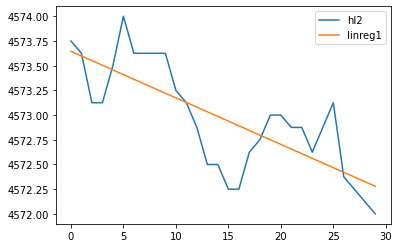

In [37]:
df_try[['hl2','linreg1']].plot()

In [57]:
df_try.head()

,index,Datetime,Open,High,Low,Close,hl2,Date,linreg1,linreg2,line
0,0,2022-04-04 23:30:00,4574.00,4574.00,4573.50,4573.50,4573.750,2022-04-04,4573.645161,4573.645161,4573.645161
1,1,2022-04-04 23:31:00,4573.75,4573.75,4573.50,4573.50,4573.625,2022-04-04,4573.598081,4573.598081,4573.598081
2,2,2022-04-04 23:32:00,4573.25,4573.25,4573.00,4573.25,4573.125,2022-04-04,4573.551001,4573.551001,4573.551001
3,3,2022-04-04 23:33:00,4573.00,4573.50,4572.75,4573.25,4573.125,2022-04-04,4573.503921,4573.503921,4573.503921
4,4,2022-04-04 23:34:00,4573.50,4573.75,4573.25,4573.75,4573.500,2022-04-04,4573.456841,4573.456841,4573.456841


In [55]:
def lin_reg(x):
    return (m * x) + c

In [56]:
df_try['line'] = df_try['index'].apply(lin_reg)